In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pyimage.preprocessing import SimplePreprocessor
from pyimage.datasets import SimpleDatasetLoader
import numpy as np
from imutils import paths
import argparse

In [42]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images('datasets/animals'))

width = height = 32
sp = SimplePreprocessor(width,height)
sdl = SimpleDatasetLoader(preprocessors=[sp])
data,labels = sdl.load(imagePaths,verbose=500)
data_reshaped = data.reshape((data.shape[0],3072))

print(f"[INFO] features matrix: {data_reshaped.nbytes/(1024 * 1024.0):.1f}MB")

le = LabelEncoder()
labels = le.fit_transform(labels)

trainX,testX,trainY,testY = train_test_split(data_reshaped,labels,test_size=0.25,random_state=42)

print("[INFO] Fitting and evaluating KNN classifier")
model = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
model.fit(trainX,trainY)
print(classification_report(testY,model.predict(testX),target_names=le.classes_))

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] features matrix: 8.8MB
[INFO] Fitting and evaluating KNN classifier
              precision    recall  f1-score   support

        cats       0.41      0.58      0.48       262
        dogs       0.38      0.47      0.42       249
       panda       0.86      0.26      0.40       239

    accuracy                           0.44       750
   macro avg       0.55      0.44      0.44       750
weighted avg       0.54      0.44      0.44       750



In [8]:
le = LabelEncoder()

In [9]:
le.fit_transform(labels)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [10]:
le.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [3]:
import matplotlib.pyplot as plt
import cv2

In [43]:
predictions = model.predict(testX)

In [44]:
labels = le.inverse_transform(predictions)

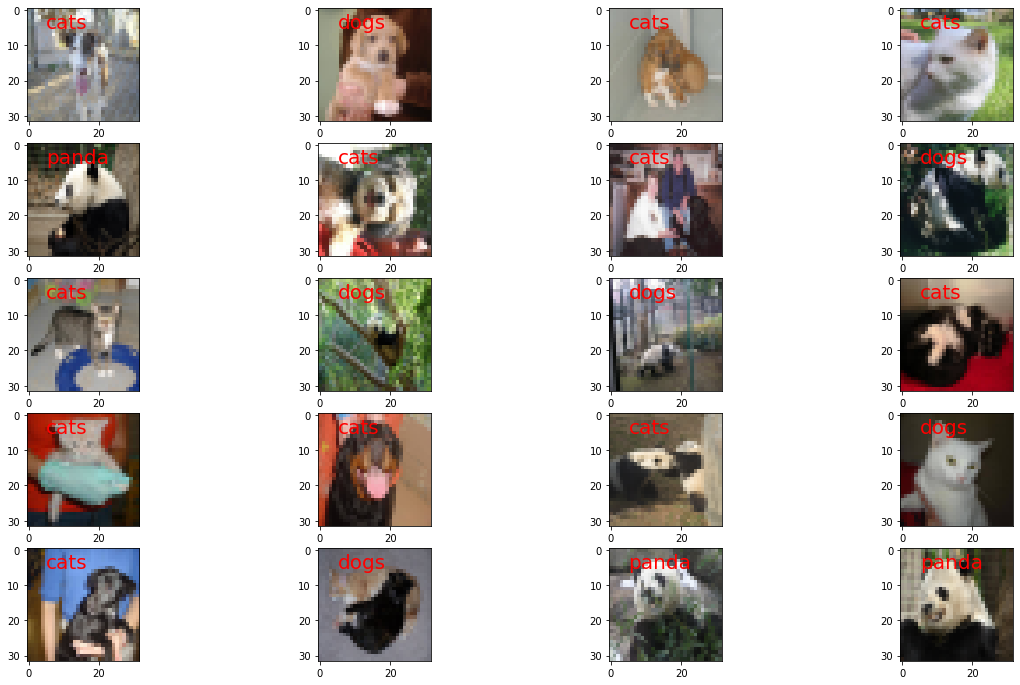

In [48]:
fig = plt.figure(figsize=(20,12))

i = 1
for image,label in zip(testX[:20],labels[:20]):
    ax =fig.add_subplot(5,4,i)
#image = cv2.putText(data[-],'Cat',(5,15),cv2.FONT_HERSHEY_SIMPLEX,0.20,(0,0,255),1,cv2.LINE_AA)
    
    image = image.reshape((32,32,3))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.annotate(label,(5,5),color='red',fontsize=20)
    i += 1

In [67]:
import random

In [70]:
images = random.sample(imagePaths,20)

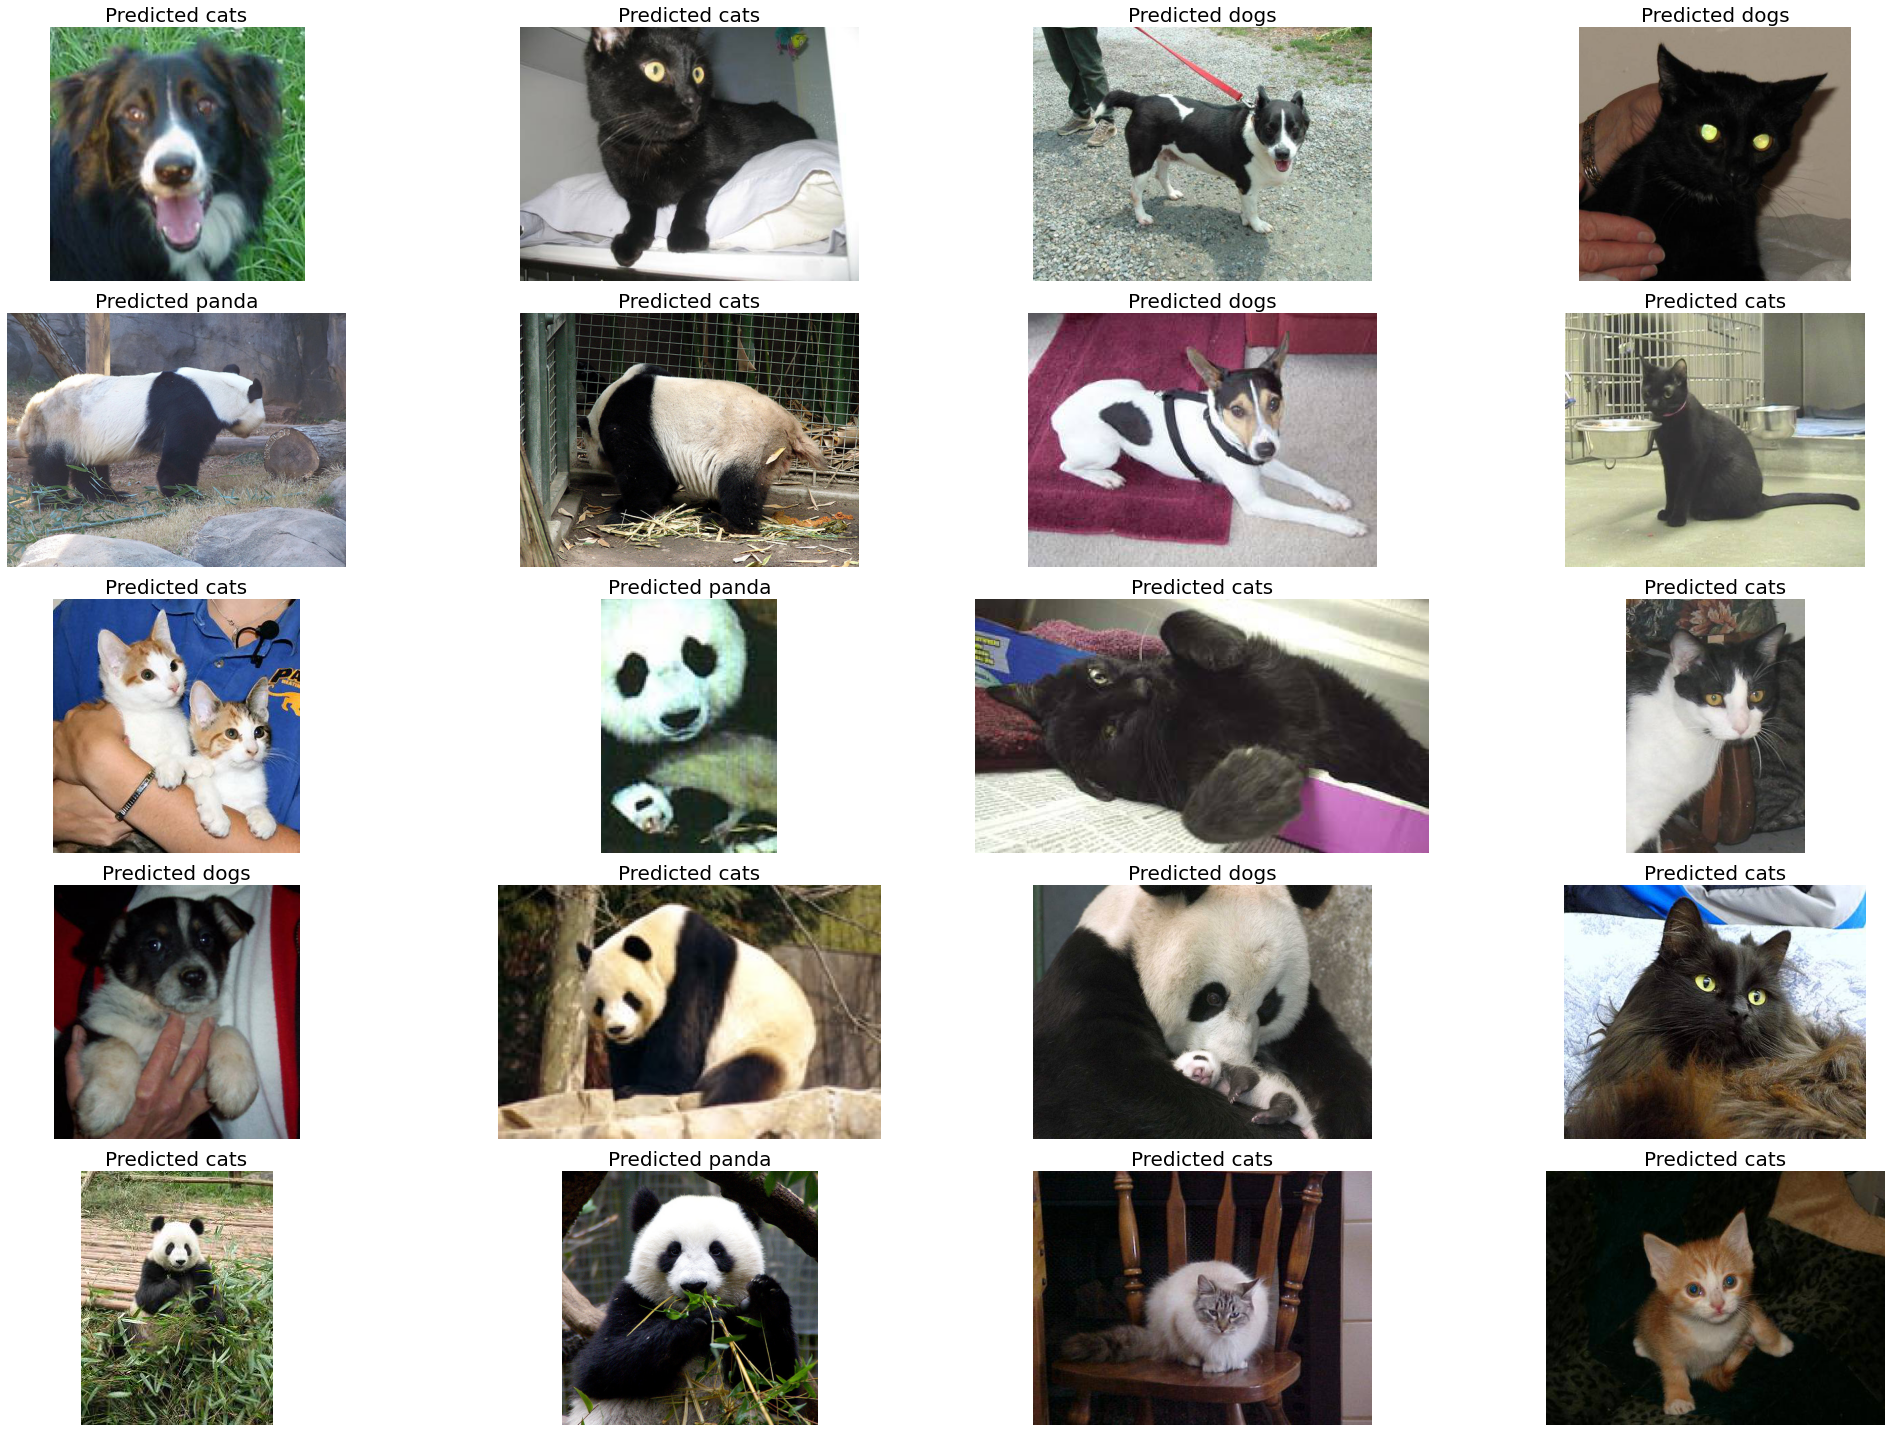

In [72]:
fig = plt.figure(figsize=(30,20))
for i,path in enumerate(images):
    ax = fig.add_subplot(5,4,i + 1)
    raw_image = cv2.imread(path)
    image = cv2.resize(raw_image,(32,32),interpolation=cv2.INTER_AREA)
    image = image.reshape((1,32 * 32 * 3))
    label = model.predict(image)
    label = le.inverse_transform(label)[0]
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
    ax.imshow(raw_image)
    ax.set_title(f"Predicted {label}",fontsize=20)
    ax.tick_params(axis='both',)
    ax.axis('off')
fig.tight_layout()

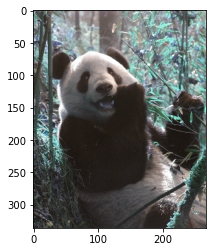

In [51]:
plt.imshow(cv2.imread(imagePaths[-1]))